In [1]:
import pandas as pd

df = pd.read_csv("local-data/wifi_map_6-10-2025_19_19_26_home_consum.csv", sep=";")

times = df["Time from start (seconds)"].unique()

# splitting the data base on same moment adquisition
subsets = []
for tm in times:
    sub = df.loc[df["Time from start (seconds)"] == tm]
    subsets.append(sub)
subsets[0]

,AP hash,Distance (meters),AP auth mode,Time from start (seconds)
0,f8a4985c,0.62,3,7
1,bab9b9a6,21.54,3,7
2,2d2facaa,21.54,3,7
3,2e41b0ed,23.71,4,7
4,f81b53a0,42.17,3,7
5,f81b53a0,82.54,3,7
6,287de1e8,90.85,3,7
7,58d968cb,100.00,4,7
8,f8fe611,110.07,3,7
9,163976e1,110.07,4,7


In [2]:
# get an array holding all the nearest APs
nearests_uniq = []
for sub in subsets:
    ap_hash = sub.iloc[0,0]
    if len(nearests_uniq) == 0:
        nearests_uniq.append(ap_hash)
    else:
        if ap_hash not in nearests_uniq:
            nearests_uniq.append(ap_hash) 
nearests_uniq

['f8a4985c',
 '394d4b0b',
 '2d2facaa',
 '2e41b0ed',
 '7b2695be',
 '163976e1',
 '9669d9a2',
 '427291b2',
 '4427ba31',
 '5e530b88',
 '432991f',
 '2c5f477a',
 'abe24d56',
 'd23a1d38',
 'd5dde450',
 '523ecfa4',
 '797617cf',
 '286a2ffb',
 '6b369a29',
 '46d2aec2',
 '36d13bd',
 '7f3d6552',
 'a22130e6',
 'fdd1db11',
 '433e2f6a',
 'acf8fb78',
 '1836123a',
 'f1919773',
 'd8c1524d',
 'b81cee1e',
 '9f03c406',
 '939ea8fd']

In [3]:
# get all data related with the nearest APs
interest_aps = []
for closer in nearests_uniq:
    interest_aps.append(df.loc[df['AP hash'] == closer])
interest_aps

[      AP hash  Distance (meters)  AP auth mode  Time from start (seconds)
 0    f8a4985c               0.62             3                          7
 11   f8a4985c               0.56             3                         10
 28   f8a4985c               1.78             3                         14
 45   f8a4985c               2.61             3                         18
 59   f8a4985c               3.48             3                         21
 72   f8a4985c               3.83             3                         25
 85   f8a4985c               5.62             3                         28
 97   f8a4985c               4.64             3                         32
 112  f8a4985c               4.22             3                         35
 129  f8a4985c               4.22             3                         39
 144  f8a4985c               5.62             3                         43
 155  f8a4985c               3.83             3                         46
 168  f8a4985c           

In [43]:
walked_distance = 0
time = 0
for i, aps in enumerate(interest_aps):
    if i == 0:
        walked_distance += interest_aps[i].tail(1).iloc[0,1]
        time = interest_aps[i].tail(1).iloc[0,3]
    else:
        row = interest_aps[i].loc[df["Time from start (seconds)"] == time]
        if not row.empty:
            # start_walked_distance = interest_aps[i].tail(1).iloc[0,1]
            print(row)
        
(walked_distance, time)


      AP hash  Distance (meters)  AP auth mode  Time from start (seconds)
471  2d2facaa              82.54             3                        121
      AP hash  Distance (meters)  AP auth mode  Time from start (seconds)
457  7b2695be              13.34             4                        121
      AP hash  Distance (meters)  AP auth mode  Time from start (seconds)
459  9669d9a2              16.16             3                        121
      AP hash  Distance (meters)  AP auth mode  Time from start (seconds)
465  2c5f477a              56.23             3                        121
      AP hash  Distance (meters)  AP auth mode  Time from start (seconds)
466  abe24d56               61.9             3                        121


(np.float64(437.5), np.int64(121))

In [4]:
# drawing for the revelant APs the distance on time
# commented since seems that is very memory consuming

# for i_ap in interest_aps:
#     i_ap.plot.scatter(
#     x="Time from start (seconds)", 
#     y="Distance (meters)", 
#     grid=True, 
#     title=i_ap.iloc[0,0],
#     figsize=(2,3))

<Axes: title={'center': '7b2695be'}, xlabel='Time from start (seconds)', ylabel='Distance (meters)'>

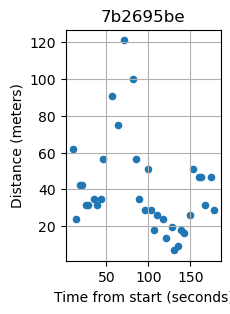

In [5]:
# drawing for the revelant AP the distance on time
i = 4
interest_aps[i].plot.scatter(
    x="Time from start (seconds)", 
    y="Distance (meters)", 
    grid=True, 
    title=interest_aps[i].iloc[0,0],
    figsize=(2,3))

In [6]:
# number of different APs
df['AP hash'].unique().size

191

<Axes: xlabel='AP hash', ylabel='AP auth mode'>

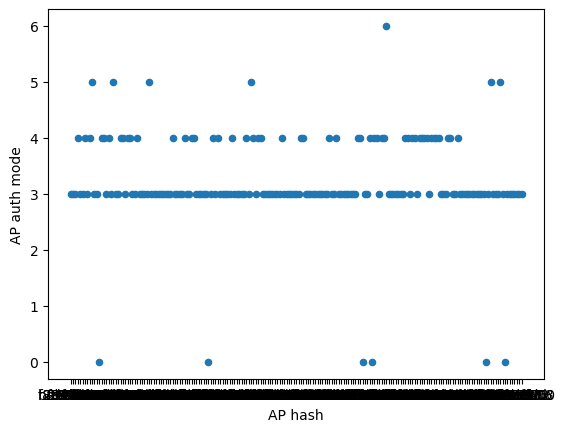

In [7]:
df.drop_duplicates(subset='AP hash').plot.scatter(x="AP hash", y="AP auth mode")

In [8]:
# open auth mode APs
odf = df.loc[df['AP auth mode'] == 0]
odf.drop_duplicates(subset='AP hash')

,AP hash,Distance (meters),AP auth mode,Time from start (seconds)
18,330695ec,61.90,0,10
507,286a2ffb,61.90,0,128
903,c0ec9161,100.00,0,199
930,d0529af8,61.90,0,206
1223,305297ae,46.42,0,263
1260,939ea8fd,42.17,0,270
